In [13]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

In [14]:
R = 99.4
Rl = 38.0
C = 4.7*n
L = 10*m
Rg = 50

vin = 3.6

In [15]:
Rtot   = R + Rl + Rg
omega0 = 1/sqrt(L*C)
alpha  = Rtot/(2*L)
beta   = sqrt( omega0**2 - alpha**2 )
A = vin*(Rtot/(L*beta))

Rcrit = omega0*2*L-(Rl+Rg)

In [16]:
#Misure

#Parte 1
D = pd.read_csv('Data.csv').T.to_numpy()
Tm = D[0]
Voutm = D[1]

#Parte 2
Rcritm = 2680

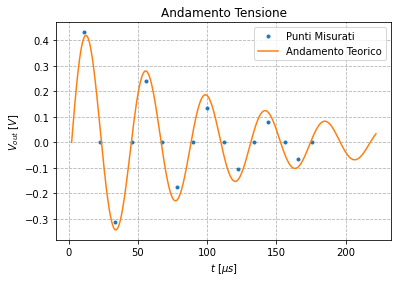

In [17]:
#Parte 1
plt.plot(Tm,Voutm,ls='', marker='.',label='Punti Misurati')

tmin = np.min(0)
tmax = np.max(220)
t = np.linspace(tmin,tmax,1000)
vout = A*np.exp(-alpha*t*u)*np.sin(beta*t*u) # *u correzione unita di misura
plt.plot(t+2,vout,label='Andamento Teorico')



plt.grid(which="both", ls="--",color='0.7')
plt.title('Andamento Tensione')
plt.ylabel("$V_{out}\ [V]$")
plt.xlabel("$t\ [\mu s]$")
plt.legend(loc="upper right")

In [18]:
# Parte 2
print('R. Critica Stimata  =',Rcrit)
print('R. Critica Misurata =',Rcritm)

R. Critica Stimata  = 2829.299829957891
R. Critica Misurata = 2680


In [19]:
#Fit Lineari

err = np.asarray([0.01,0.01,0.01,0.01])

Vmax = np.asarray([Voutm[0],Voutm[4],Voutm[8],Voutm[12]])
Tmax = np.asarray([Tm[0],Tm[4],Tm[8],Tm[12]])

Vmin = np.asarray([Voutm[2],Voutm[6],Voutm[10],Voutm[14]])
Tmin = np.asarray([Tm[2],Tm[6],Tm[10],Tm[14]])
 
Max = my.my_lin_fit(Tmax*u, np.log(Vmax), err, verbose=False, plot=False, grid=True, err=False)
Min = my.my_lin_fit(Tmin*u, np.log(-Vmin), err, verbose=False, plot=False, grid=True, err=False)

print('alpha [Teo] = ',  alpha)
print('alpha [max] = ',-Max[0])
print('alpha [min] = ',-Min[0])

alpha [Teo] =  9370.0
alpha [max] =  12669.272630417447
alpha [min] =  11964.703312264539


(0.0, 150.0)

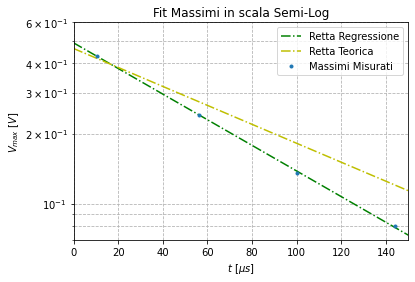

In [20]:
#Grafico Max

#Regressione 
reg_M = np.exp(Max[0]*t*u  + Max[2]) 
plt.plot(t, reg_M,'g-.',label='Retta Regressione')

#Retta teorica
teo_M = np.exp(-alpha*t*u)*A
plt.plot(t, teo_M,'y-.',label='Retta Teorica')

#Punti Misurati
plt.plot(Tmax, Vmax,ls='', marker='.',label='Massimi Misurati')

plt.title('Fit Massimi in scala Semi-Log')
plt.yscale('log')
plt.grid(which="both", ls="--",color='0.7')
plt.ylabel("$V_{max}\ [V]$")
plt.xlabel("$t\ [\mu s]$")
plt.legend()
plt.ylim(70*m,600*m)
plt.xlim(0,150)

(0.0, 170.0)

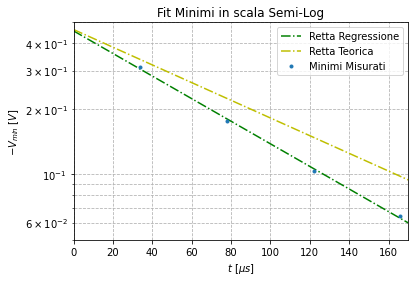

In [21]:
#Grafico Min

#Regressione 
reg_m = np.exp(Min[0]*t*u + Min[2])
plt.plot(t, reg_m,'g-.',label='Retta Regressione')

#Retta teorica
teo_m = np.exp(-alpha*t*u)*A
plt.plot(t, teo_m,'y-.',label='Retta Teorica')

#Punti Misurati
plt.plot(Tmin, -Vmin,ls='', marker='.',label='Minimi Misurati')

plt.title('Fit Minimi in scala Semi-Log')
plt.yscale('log')
plt.grid(which="both", ls="--",color='0.7')
plt.ylabel("$-V_{min}\ [V]$")
plt.xlabel("$t\ [\mu s]$")
plt.legend()
plt.ylim(50*m,500*m)
plt.xlim(0,170)

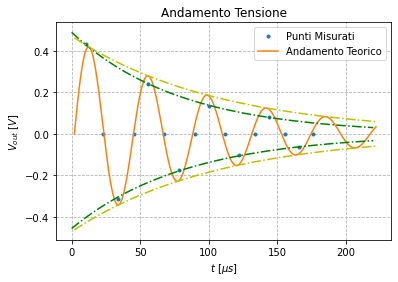

In [22]:
#Grafico Finale
plt.plot(Tm,Voutm,ls='', marker='.',label='Punti Misurati')

vout = A*np.exp(-alpha*t*u)*np.sin(beta*t*u) # *u correzione unita di misura
plt.plot(t+2,vout,label='Andamento Teorico')

#Max
plt.plot(t, reg_M,'g-.') 
plt.plot(t+2, teo_M,'y-.')

#Min
plt.plot(t, -reg_m,'g-.')
plt.plot(t+2, -teo_m,'y-.')

plt.grid(which="both", ls="--",color='0.7')
plt.title('Andamento Tensione')
plt.ylabel("$V_{out}\ [V]$")
plt.xlabel("$t\ [\mu s]$")
plt.legend(loc="upper right")